## Hands-on - Basic Statistics in Python

In [45]:
# Import necessary libraries
import pandas as pd  # for handling tabular datasets
import numpy as np  # for numerical computations
from scipy import stats  # for statistical operations
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns  # for advanced statistical plots

# Load dataset from GitHub URL
file_path = "https://raw.githubusercontent.com/Hamed-Ahmadinia/DASP-2025/refs/heads/main/medical_examination.csv"  # URL link to the dataset stored on GitHub

# Read the dataset into a pandas dataframe
df = pd.read_csv(file_path)  # Load the dataset as a pandas DataFrame

# Display the first few rows of the dataframe to confirm the data has been loaded correctly
print("Dataset Preview:")  # Print a label for context
print(df.head(5))  # Display the first 5 rows of the dataset

Dataset Preview:
   id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393    2     168    62.0    110     80            1     1      0   
1   1  20228    1     156    85.0    140     90            3     1      0   
2   2  18857    1     165    64.0    130     70            3     1      0   
3   3  17623    2     169    82.0    150    100            1     1      0   
4   4  17474    1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


### **Exercise 1: Display Dataset Information**
**Question:** Use df.info() to display basic information about the dataset.

In [46]:
# Your code here:
print("Dataset information:")
print(df.info())

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
None


### **Exercise 2: Calculate Minimum and Maximum Values**  
**Question:** Calculate the **minimum** and **maximum** values for the following columns:  

- **"height"**  
- **"weight"**  
- **"ap_hi"** (systolic blood pressure)  
- **"ap_lo"** (diasblood pressure)re)  


In [47]:
# Your code here:
height_values = df['height'].dropna().values
print("Minimum height:", np.min(height_values))
print("Maximum height:", np.max(height_values))

weight_values = df['weight'].dropna().values
print("Minimum weight:", np.min(weight_values))
print("Maximum weight:", np.max(weight_values))

ap_hi_values = df['ap_hi'].dropna().values
print("Minimum ap_hi:", np.min(ap_hi_values))
print("Maximum ap_hi:", np.max(ap_hi_values))

ap_lo_values = df['ap_lo'].dropna().values
print("Minimum ap_lo:", np.min(ap_lo_values))
print("Maximum ap_lo:", np.max(ap_lo_values))

Minimum height: 55
Maximum height: 250
Minimum weight: 10.0
Maximum weight: 200.0
Minimum ap_hi: -150
Maximum ap_hi: 16020
Minimum ap_lo: -70
Maximum ap_lo: 11000


### **Exercise 3: Compute Measures of Central Tendency**  
**Question:** Calculate the **mean**, **median**, and **mode** for the specified columns:  

- **Mean:** Compute the mean of the **"weight"** column.  
- **Median:** Compute the median of the **"ap_hi"** (systolic blood pressure) column.  
- **Mode:** Compute the mode of the **"gender"** column.  

In [48]:
# Your code here:
mean_weight = df['weight'].mean()
print(f"Mean value of weight: {mean_weight:.2f}")

median_ap_hi = df['ap_hi'].median()
print(f"Median value of systolic blood pressure: {median_ap_hi:.2f}")

mode_gender = stats.mode(df['sex'], keepdims=True)
print(f"Most common gender is: {mode_gender.mode[0]}, which represent women, Count: {mode_gender.count[0]}")
# The reason why I assume gender 1 is women explained in the next cell.

Mean value of weight: 74.21
Median value of systolic blood pressure: 120.00
Most common gender is: 1, which represent women, Count: 45522


In [49]:
# Since the dataset doesn’t specify which gender corresponds to 1 or 2, I will use smoking and drinking habits to make an assumption. Typically, men are more likely to smoke and drink than women.

# Check gender distribution
gender_sum = df['sex'].value_counts()
print(gender_sum)

total_smokers = df[df['smoke'] ==1].shape[0]
total_drinkers = df[df['alco'] ==1].shape[0]

smoker_gender1 = df[(df['sex'] == 1) & (df['smoke'] == 1)].shape[0]
smoker_gender2 = df[(df['sex'] == 2) & (df['smoke'] == 1)].shape[0]

gender1_percentage = round((smoker_gender1 / total_smokers) * 100,2)
gender2_percentage = round((smoker_gender2 / total_smokers) * 100,2)

smoker_count_table = pd.DataFrame({'gender':['gender1', 'gender2'], 
                                   'smoker_count':[smoker_gender1,smoker_gender2],
                                   'smoker_percentage':[gender1_percentage, gender2_percentage]}) 
print(smoker_count_table)

drinker_gender1 = df[(df['sex'] == 1) & (df['alco'] == 1)].shape[0]
drinker_gender2 = df[(df['sex'] == 2) & (df['alco'] == 1)].shape[0]
gender1_percentage_d = round((drinker_gender1/ total_drinkers) * 100,2)
gender2_percentage_d = round((drinker_gender2/ total_drinkers) * 100,2)

drinker_count_table = pd.DataFrame({'gender':['gender1', 'gender2'], 
                                   'drinker_count':[drinker_gender1,drinker_gender2],
                                   'drinker_percentage':[gender1_percentage_d, gender2_percentage_d]}) 
print(drinker_count_table)

# The result shows that although the total number of gender 1 is much larger than that of gender 2, gender 2 still occupies a larger proportion among the overall smokers and drinkers, indicating that gender 2 is more likely to represent males.

sex
1    45522
2    24467
3       11
Name: count, dtype: int64
    gender  smoker_count  smoker_percentage
0  gender1           813              13.18
1  gender2          5356              86.82
    gender  drinker_count  drinker_percentage
0  gender1           1161               30.84
1  gender2           2603               69.16


### **Exercise 4: Compute Quantiles and Interquartile Range (IQR)**  
**Question:** Compute the **Q1**, **Q2 (median)**, and **Q3** for the **"cholesterol"** column and calculate the **Interquartile Range (IQR)**. 


Q1 (25th percentile of cholesterol): 1.00
Q3 (75th percentile of cholesterol): 2.00
Interquartile range of cholesterol: 1.00


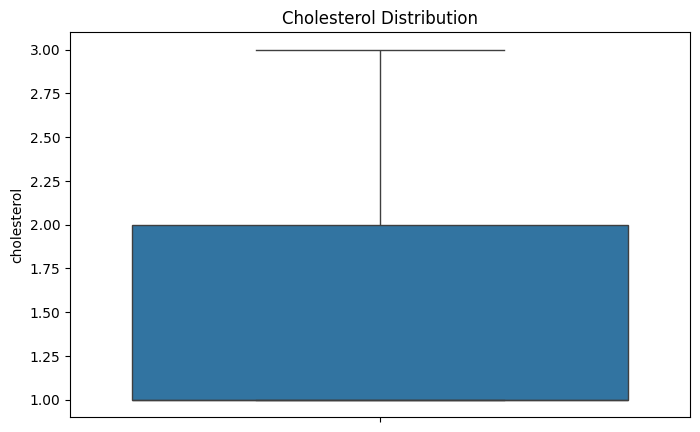

The interquartile range (IQR) is 1.00, 
indicating that the middle 50% of cholesterol values fall within the range of 1.00.
This suggests that most individuals have similar cholesterol levels,
 and the data is relatively concentrated.


In [50]:
# Your code here:
q1_cholesterol = df['cholesterol'].quantile(0.25)
q3_cholesterol = df['cholesterol'].quantile(0.75)
iqr_cholesterol = q3_cholesterol - q1_cholesterol

print(f"Q1 (25th percentile of cholesterol): {q1_cholesterol:.2f}")
print(f"Q3 (75th percentile of cholesterol): {q3_cholesterol:.2f}")
print(f"Interquartile range of cholesterol: {iqr_cholesterol:.2f}")

plt.figure(figsize=(8, 5))
sns.boxplot(df['cholesterol'])
plt.title("Cholesterol Distribution")
plt.show()

print("The interquartile range (IQR) is 1.00, \nindicating that the middle 50% of cholesterol values fall within the range of 1.00.\nThis suggests that most individuals have similar cholesterol levels,\n and the data is relatively concentrated.")

### **Exercise 5: Grouped Analysis by Gender**  
**Question:** Calculate the **mean** of the **"weight"** column grouped by **"gender"**. 


In [51]:
# Your code here:
mean_weight_groupby_gender = df.groupby('sex')['weight'].mean().round(2)
print(mean_weight_groupby_gender)

sex
1    72.57
2    77.26
3    69.82
Name: weight, dtype: float64


In [52]:
#Name: Yue Zhang
#Student ID: 2421832
#Email: Yue.Zhang2@metropolia.fi